In [ ]:
!pip install seaborn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
file_path = "/content/EvaluacionRespuestasSLMs.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")




In [ ]:
print(df.columns)

Index(['Pregunta ID', 'Idioma', 'Modelo', 'Benchmark', 'Intento 1',
       'Intento 2', 'Intento 3', 'Estado', 'Tecnica'],
      dtype='object')


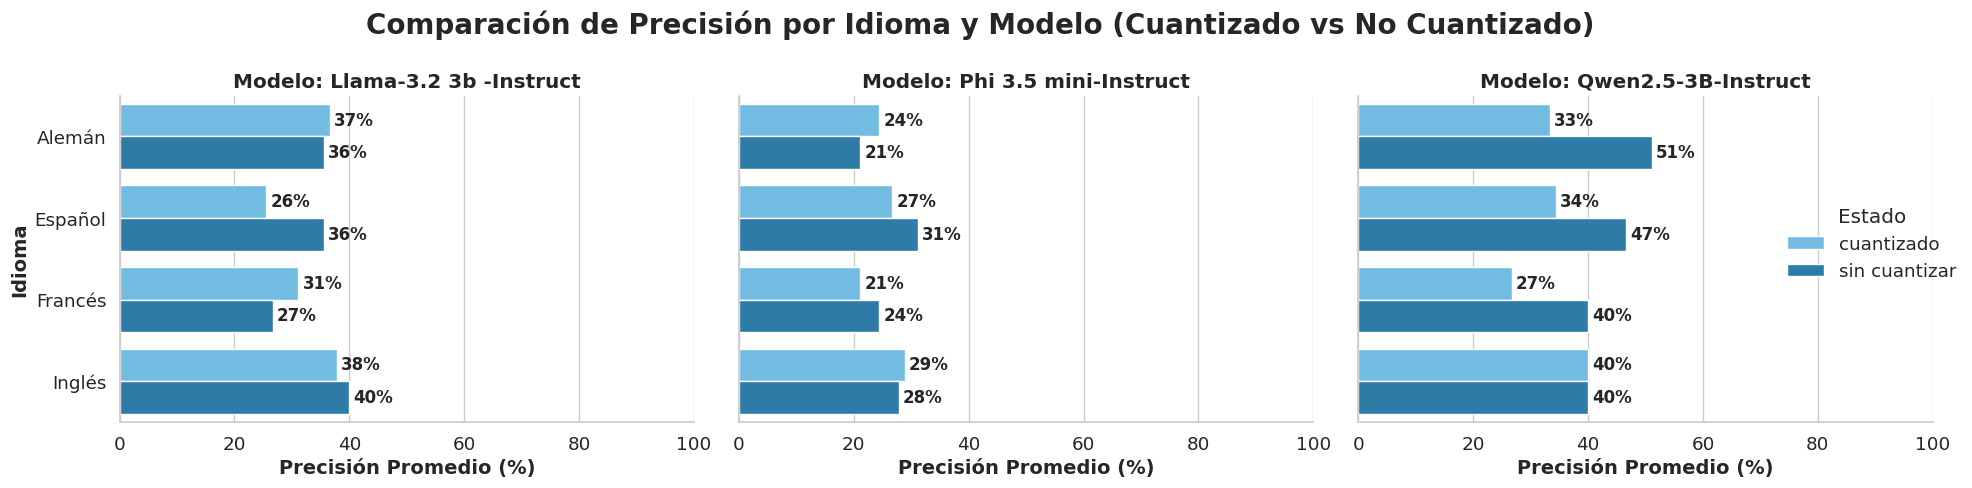

In [ ]:

# Cargar el archivo Excel
file_path = "/content/EvaluacionRespuestasSLMs.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")


# Calcular precisión promedio por fila y escalar a 100
df['Precisión'] = df[['Intento 1', 'Intento 2', 'Intento 3']].mean(axis=1) * 100

# Agrupar por Idioma, Modelo y Estado (cuantizado o no) para obtener precisión promedio
df_grouped = df.groupby(['Idioma', 'Modelo', 'Estado'])['Precisión'].mean().reset_index()

# Estilo profesional con colores personalizados
sns.set(style="whitegrid", font_scale=1.2, palette=["#5ec3f3", "#1a80bb"])

# Crear gráfico de barras horizontales
g = sns.catplot(
    data=df_grouped, kind="bar",
    y="Idioma", x="Precisión", hue="Estado",
    col="Modelo", col_wrap=3,
    height=5, aspect=1.2,
    palette=["#5ec3f3", "#1a80bb"], orient="h"
)

# Modificar los títulos, etiquetas y leyendas en negrita y aumentar el tamaño de la fuente
g.set_titles("Modelo: {col_name}", fontweight='bold', fontsize=18)
g.set_axis_labels("Precisión Promedio (%)", "Idioma", fontweight='bold', fontsize=14)
g.set(xlim=(0, 100))  # Eje X en porcentaje

# Aumentar el tamaño de las etiquetas de porcentaje en las barras
for ax in g.axes.flatten():
    for container in ax.containers:
        ax.bar_label(container, fmt="%.0f%%", label_type="edge", padding=3, fontsize=12, fontweight='bold')

# Ajustar la posición y estilo del título general
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Comparación de Precisión por Idioma y Modelo (Cuantizado vs No Cuantizado)", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:

# Calcular precisión promedio por fila y escalar a 100
df['Precisión'] = df[['Intento 1', 'Intento 2', 'Intento 3']].mean(axis=1) * 100

# Agrupar por Idioma, Modelo y Estado (cuantizado o no) para obtener precisión promedio
df_grouped = df.groupby(['Idioma', 'Modelo', 'Estado'])['Precisión'].mean().reset_index()


# exportar a Excel:
df_grouped.to_excel("/content/precisiones_por_idioma_modelo_estado.xlsx", index=False)


In [ ]:
# Mostrar el DataFrame con los valores
df_grouped

,Idioma,Modelo,Estado,Precisión
0,Aleman,Llama-3.2 3b -Instruct,cuantizado,36.666667
1,Aleman,Llama-3.2 3b -Instruct,sin cuantizar,35.555556
2,Aleman,Phi 3.5 mini-Instruct,cuantizado,24.444444
3,Aleman,Phi 3.5 mini-Instruct,sin cuantizar,21.111111
4,Aleman,Qwen2.5-3B-Instruct,cuantizado,33.333333
5,Aleman,Qwen2.5-3B-Instruct,sin cuantizar,51.111111
6,Espanol,Llama-3.2 3b -Instruct,cuantizado,25.555556
7,Espanol,Llama-3.2 3b -Instruct,sin cuantizar,35.555556
8,Espanol,Phi 3.5 mini-Instruct,cuantizado,26.666667
9,Espanol,Phi 3.5 mini-Instruct,sin cuantizar,31.111111


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Cargar el archivo Excel
file_path = "/content/EvaluacionRespuestasSLMs.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Calcular precisión promedio por fila y escalar a 100
df['Precisión'] = df[['Intento 1', 'Intento 2', 'Intento 3']].mean(axis=1) * 100

# Agrupar por Idioma, Modelo y Estado
df_grouped = df.groupby(['Idioma', 'Modelo', 'Estado'])

# Calcular la media y desviación estándar para cada grupo
df_summary = df_grouped['Precisión'].agg(['mean', 'std', 'count']).reset_index()

# Calcular el intervalo de confianza para cada grupo
# Usaremos un nivel de confianza del 95% y Z=1.96
z = stats.norm.ppf(0.975)  # Para el intervalo de confianza del 95%

# Calcular el margen de error
df_summary['margen_error'] = z * (df_summary['std'] / np.sqrt(df_summary['count']))

# Calcular el intervalo de confianza inferior y superior
df_summary['CI Inferior'] = df_summary['mean'] - df_summary['margen_error']
df_summary['CI Superior'] = df_summary['mean'] + df_summary['margen_error']

# Mostrar el DataFrame con los resultados
print(df_summary)


     Idioma                  Modelo         Estado       mean        std  \
0    Alemán  Llama-3.2 3b -Instruct     cuantizado  36.666667  49.013252   
1    Alemán  Llama-3.2 3b -Instruct  sin cuantizar  35.555556  47.086236   
2    Alemán   Phi 3.5 mini-Instruct     cuantizado  24.444444  42.824898   
3    Alemán   Phi 3.5 mini-Instruct  sin cuantizar  21.111111  40.573790   
4    Alemán     Qwen2.5-3B-Instruct     cuantizado  33.333333  46.320556   
5    Alemán     Qwen2.5-3B-Instruct  sin cuantizar  51.111111  38.886152   
6   Español  Llama-3.2 3b -Instruct     cuantizado  25.555556  43.490725   
7   Español  Llama-3.2 3b -Instruct  sin cuantizar  35.555556  47.893027   
8   Español   Phi 3.5 mini-Instruct     cuantizado  26.666667  43.240395   
9   Español   Phi 3.5 mini-Instruct  sin cuantizar  31.111111  39.082713   
10  Español     Qwen2.5-3B-Instruct     cuantizado  34.444444  45.048576   
11  Español     Qwen2.5-3B-Instruct  sin cuantizar  46.666667  50.741626   
12  Francés 


Resumen inicial de datos:
Total de registros: 720
Valores únicos en 'Estado': ['sin cuantizar' 'cuantizado']
Valores únicos en 'Tecnica': [nan 'AWQ (W4A16)']
Valores nulos por columna:
Pregunta ID      0
Idioma           0
Modelo           0
Benchmark        0
Intento 1        0
Intento 2        0
Intento 3        0
Estado           0
Tecnica        360
dtype: int64


Resultados de precisión:
+----+------------------------+----------+-------------+------------+-------------+----------------------+----------------------+----------------------+----------------------+-------------------+----------------+
|    |         Modelo         |  Idioma  |  Benchmark  |   Estado   |   Tecnica   |  Precision_Intento1  |  Precision_Intento2  |  Precision_Intento3  |  Precision_Promedio  |  Total_Preguntas  |  Consistencia  |
+====+========================+==========+=============+============+=============+======================+======================+======================+======================+==

<ipython-input-65-9511c9c17940>:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = df.groupby(['Modelo', 'Idioma', 'Benchmark', 'Estado', 'Tecnica']).apply(calculate_accuracy).reset_index()


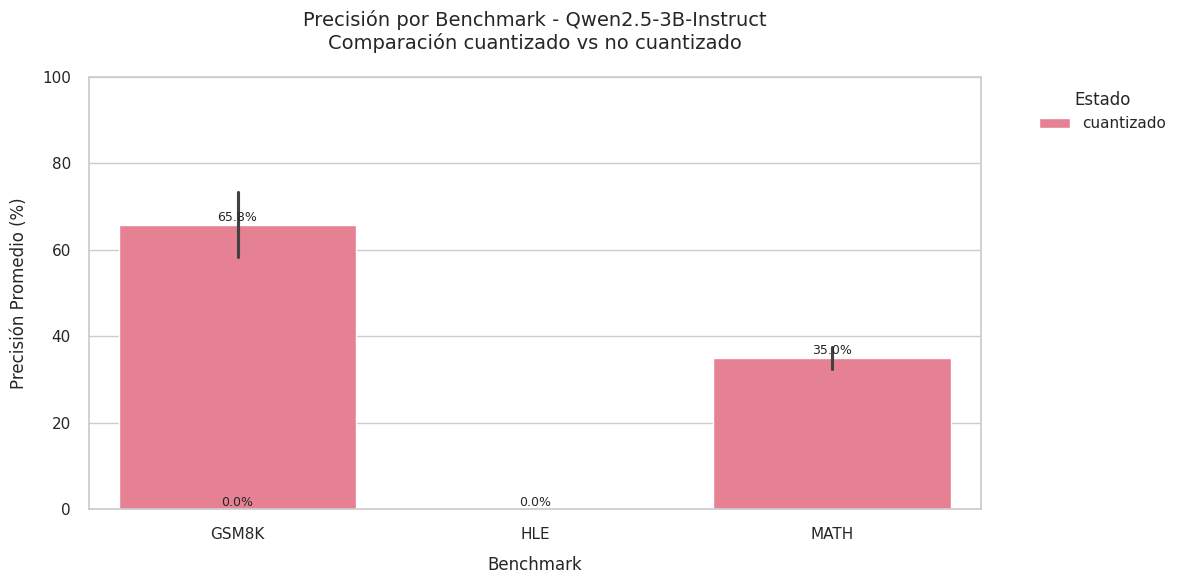

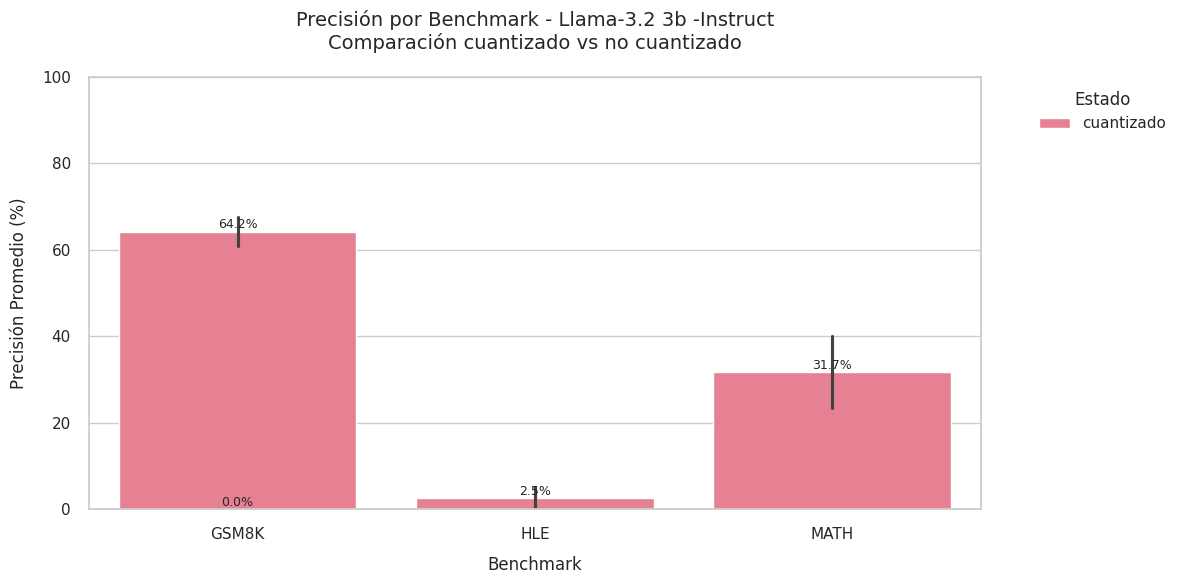

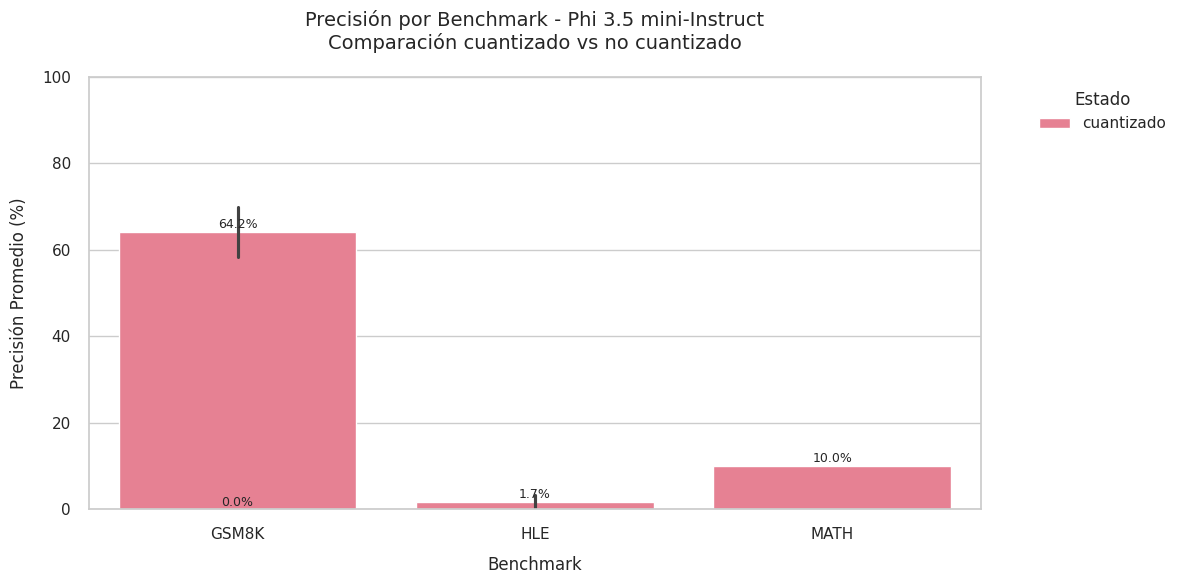

<Figure size 1400x800 with 0 Axes>

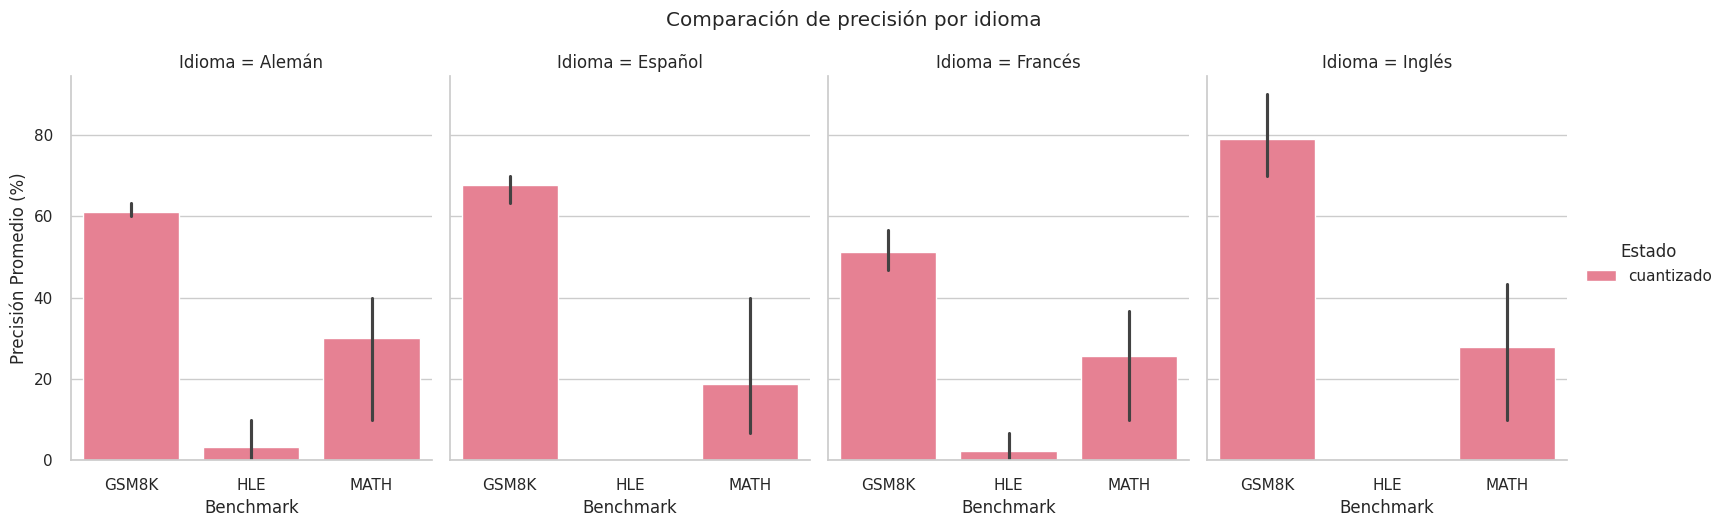

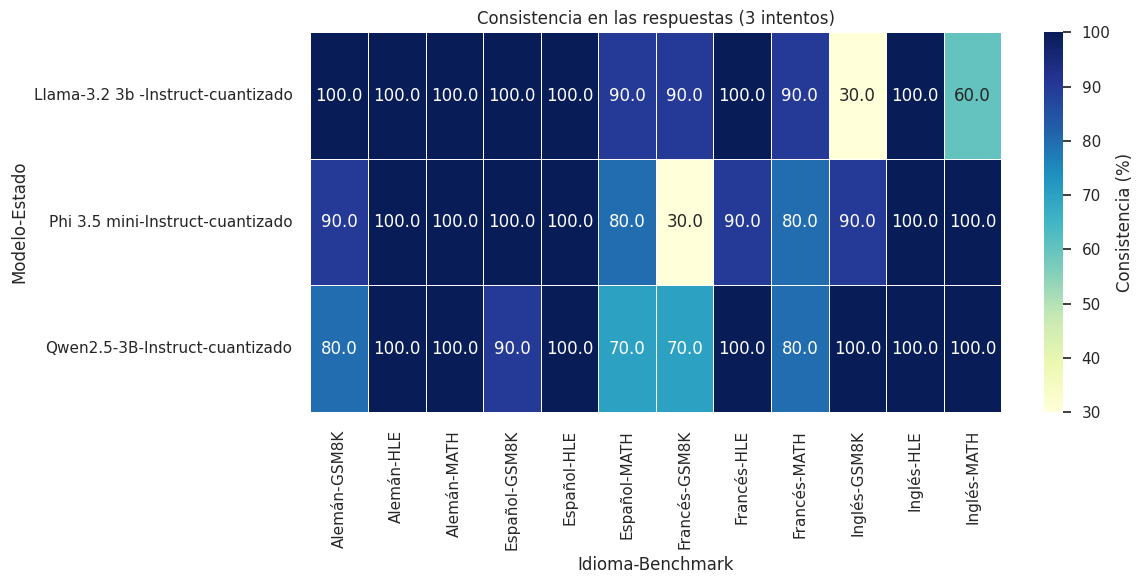


Resultados exportados exitosamente a 'resultados_precision.csv'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo - CORRECCIÓN AQUÍ
plt.style.use('seaborn-v0_8')  # Usamos el estilo compatible
sns.set_theme(style="whitegrid")  # Configuración moderna de Seaborn
sns.set_palette("husl")

# Cargar los datos
try:
    file_path = "/content/EvaluacionRespuestasSLMs.xlsx"
    df = pd.read_excel(file_path, engine="openpyxl")

    # Verificar y limpiar datos
    print(f"\n{'='*50}")
    print("Resumen inicial de datos:")
    print(f"Total de registros: {len(df)}")
    print(f"Valores únicos en 'Estado': {df['Estado'].unique()}")
    print(f"Valores únicos en 'Tecnica': {df['Tecnica'].unique()}")
    print(f"Valores nulos por columna:\n{df.isnull().sum()}")
    print(f"{'='*50}\n")

    # Calcular precisión por intento
    def calculate_accuracy(group):
        total = len(group)
        correct_1 = group['Intento 1'].sum()
        correct_2 = group['Intento 2'].sum()
        correct_3 = group['Intento 3'].sum()

        return pd.Series({
            'Precision_Intento1': correct_1 / total * 100,
            'Precision_Intento2': correct_2 / total * 100,
            'Precision_Intento3': correct_3 / total * 100,
            'Precision_Promedio': (correct_1 + correct_2 + correct_3) / (3 * total) * 100,
            'Total_Preguntas': total,
            'Consistencia': sum((group['Intento 1'] == group['Intento 2']) &
                          (group['Intento 2'] == group['Intento 3'])) / total * 100
        })

    # Agrupar y calcular métricas
    results = df.groupby(['Modelo', 'Idioma', 'Benchmark', 'Estado', 'Tecnica']).apply(calculate_accuracy).reset_index()

    # Mostrar resultados
    print("\nResultados de precisión:")
    print(results.to_markdown(tablefmt="grid", stralign="center", numalign="center"))

    # Función mejorada para graficar resultados
    def plot_results(data, title, hue_column='Estado', y_column='Precision_Promedio'):
        plt.figure(figsize=(12, 6))
        ax = sns.barplot(data=data, x='Benchmark', y=y_column, hue=hue_column,
                        errorbar=('ci', 68))  # Intervalos de confianza del 68%

        plt.title(title, fontsize=14, pad=20)
        plt.ylabel('Precisión Promedio (%)', labelpad=10)
        plt.xlabel('Benchmark', labelpad=10)
        plt.ylim(0, 100)

        # Añadir etiquetas de valor
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f"{height:.1f}%",
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontsize=9)

        plt.legend(title=hue_column, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    # Visualización 1: Comparación general por modelo
    for modelo in df['Modelo'].unique():
        model_data = results[results['Modelo'] == modelo]
        plot_results(model_data,
                    f'Precisión por Benchmark - {modelo}\nComparación cuantizado vs no cuantizado')

    # Visualización 2: Comparación por idioma con facetas
    plt.figure(figsize=(14, 8))
    g = sns.catplot(data=results, kind="bar",
                   x="Benchmark", y="Precision_Promedio",
                   hue="Estado", col="Idioma",
                   height=5, aspect=0.8, sharey=True)
    g.fig.suptitle("Comparación de precisión por idioma", y=1.05)
    g.set_axis_labels("Benchmark", "Precisión Promedio (%)")
    plt.show()

    # Visualización 3: Heatmap de consistencia
    pivot_data = results.pivot_table(index=['Modelo', 'Estado'],
                                   columns=['Idioma', 'Benchmark'],
                                   values='Consistencia')
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap="YlGnBu",
               linewidths=.5, cbar_kws={'label': 'Consistencia (%)'})
    plt.title('Consistencia en las respuestas (3 intentos)')
    plt.tight_layout()
    plt.show()

    # Exportar resultados
    results.to_csv('resultados_precision.csv', index=False)
    print("\nResultados exportados exitosamente a 'resultados_precision.csv'")

except FileNotFoundError:
    print(f"\nError: No se encontró el archivo en la ruta {file_path}")
    print("Por favor verifica la ruta del archivo y vuelve a intentarlo.")
except Exception as e:
    print(f"\nOcurrió un error inesperado: {str(e)}")




**Paso 1:** Calcular el Promedio de Precisión entre los tres intentos para cada fila:
Para esto, simplemente promediamos los valores de los intentos 1, 2 y 3.

**Paso 2:** Calcular la Diferencia de Precisión entre el primer intento y el tercer intento para ver si hay mejora o deterioro.

**Paso 3:** Comparar los resultados antes y después de cuantizar para cada idioma y modelo.

In [ ]:
# Calcular el Promedio de Precisión entre los tres intentos
df['precision_promedio'] = df[['Intento 1', 'Intento 2', 'Intento 3']].mean(axis=1)

# Calcular la diferencia de precisión entre el primer y el tercer intento
df['diferencia_precision'] = df['Intento 3'] - df['Intento 1']

# Ahora vamos a crear un DataFrame para ver los resultados agrupados por Idioma, Modelo y Cuantizado
# Calculamos el promedio de precisión para cada grupo (por idioma, modelo y cuantizado)
precision_comparacion = df.groupby(['Idioma', 'Modelo', 'Estado']).agg(
    precision_promedio_mean=('precision_promedio', 'mean'),
    diferencia_precision_mean=('diferencia_precision', 'mean')
).reset_index()

# Mostrar el resultado
print(precision_comparacion)



     Idioma                  Modelo         Estado  precision_promedio_mean  \
0    Alemán  Llama-3.2 3b -Instruct     cuantizado                 0.366667   
1    Alemán  Llama-3.2 3b -Instruct  sin cuantizar                 0.355556   
2    Alemán   Phi 3.5 mini-Instruct     cuantizado                 0.244444   
3    Alemán   Phi 3.5 mini-Instruct  sin cuantizar                 0.211111   
4    Alemán     Qwen2.5-3B-Instruct     cuantizado                 0.333333   
5    Alemán     Qwen2.5-3B-Instruct  sin cuantizar                 0.511111   
6   Español  Llama-3.2 3b -Instruct     cuantizado                 0.255556   
7   Español  Llama-3.2 3b -Instruct  sin cuantizar                 0.355556   
8   Español   Phi 3.5 mini-Instruct     cuantizado                 0.266667   
9   Español   Phi 3.5 mini-Instruct  sin cuantizar                 0.311111   
10  Español     Qwen2.5-3B-Instruct     cuantizado                 0.344444   
11  Español     Qwen2.5-3B-Instruct  sin cuantizar  

# **Average Precision Benchmark and language**

In [ ]:
# Filtrar el modelo 'Qwen2.5-3B-Instruct'
df_qwen = df[df['Modelo'] == 'Qwen2.5-3B-Instruct']

# Calcular el Promedio de Precisión entre los tres intentos
df_qwen['precision_promedio'] = df_qwen[['Intento 1', 'Intento 2', 'Intento 3']].mean(axis=1)

# Agrupar por Benchmark, Idioma y Estado, y calcular el promedio de precisión
precision_benchmark = df_qwen.groupby(['Benchmark', 'Idioma', 'Estado']).agg(
    precision_promedio_mean=('precision_promedio', 'mean')
).reset_index()

# Convertir a porcentaje
precision_benchmark['precision_promedio_mean'] = (precision_benchmark['precision_promedio_mean'] * 100).round(2)

# Mostrar el resultado
print(precision_benchmark)

   Benchmark   Idioma         Estado  precision_promedio_mean
0      GSM8K   Alemán     cuantizado                    60.00
1      GSM8K   Alemán  sin cuantizar                    86.67
2      GSM8K  Español     cuantizado                    63.33
3      GSM8K  Español  sin cuantizar                    80.00
4      GSM8K  Francés     cuantizado                    50.00
5      GSM8K  Francés  sin cuantizar                    80.00
6      GSM8K   Inglés     cuantizado                    90.00
7      GSM8K   Inglés  sin cuantizar                    90.00
8        HLE   Alemán     cuantizado                     0.00
9        HLE   Alemán  sin cuantizar                    23.33
10       HLE  Español     cuantizado                     0.00
11       HLE  Español  sin cuantizar                    10.00
12       HLE  Francés     cuantizado                     0.00
13       HLE  Francés  sin cuantizar                     6.67
14       HLE   Inglés     cuantizado                     0.00
15      

<ipython-input-53-cba2f62d520b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qwen['precision_promedio'] = df_qwen[['Intento 1', 'Intento 2', 'Intento 3']].mean(axis=1)


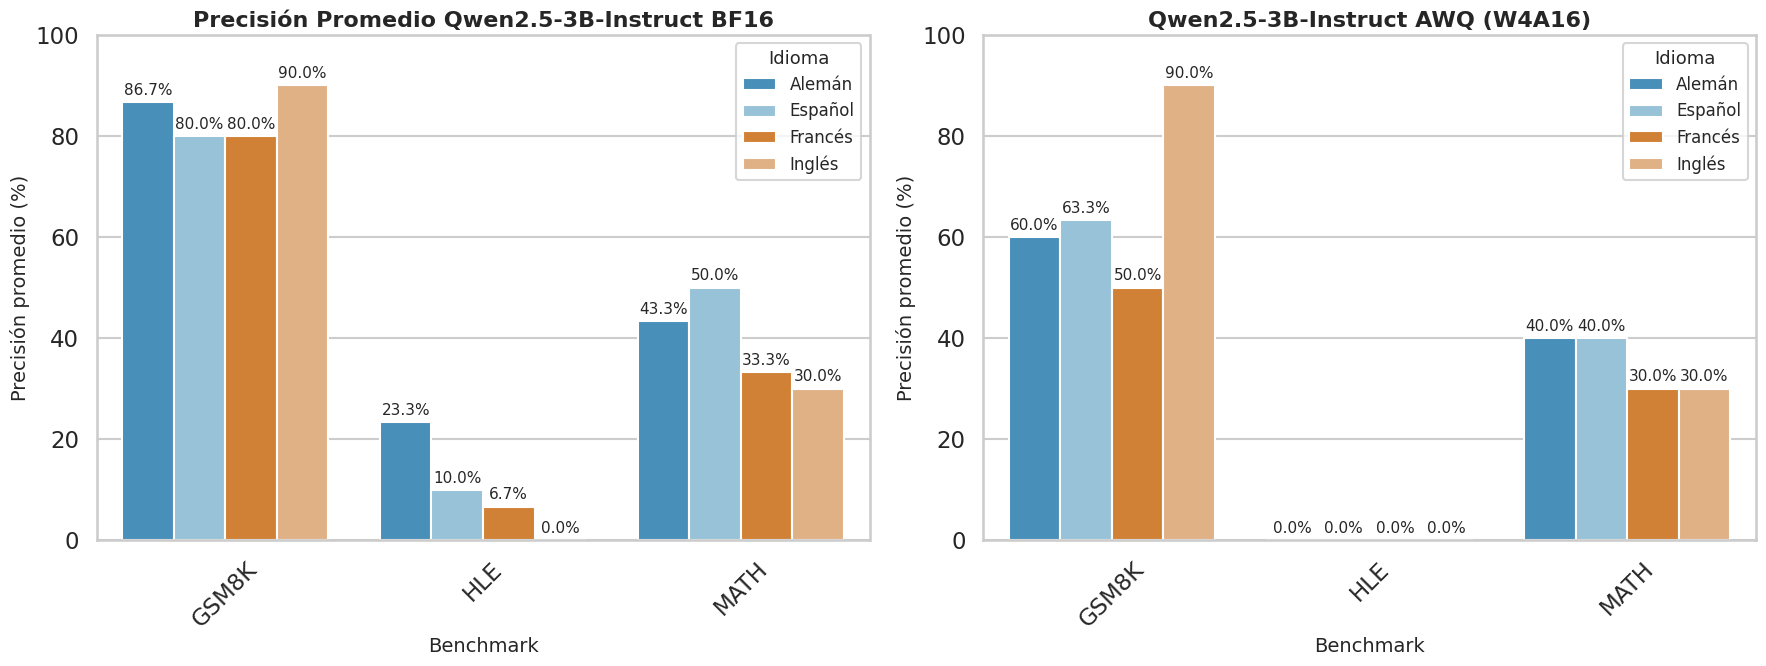

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo profesional
sns.set(style="whitegrid", context="talk")

# Definir la paleta de colores personalizada
custom_palette = ['#3594cc', '#8cc5e3','#ea801c',  '#f0b077']  # Med blue, light blue,  med orange, light orange

# Filtrar los datos para obtener las filas correspondientes a "sin cuantizar" y "cuantizado"
df_before_quantize = precision_benchmark[precision_benchmark['Estado'] == 'sin cuantizar']
df_after_quantize = precision_benchmark[precision_benchmark['Estado'] == 'cuantizado']

# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico de la precisión antes de cuantizar
sns.barplot(data=df_before_quantize,
            x='Benchmark',
            y='precision_promedio_mean',
            hue='Idioma',
            ax=axes[0],
            palette=custom_palette)

axes[0].set_title('Precisión Promedio Qwen2.5-3B-Instruct BF16', fontsize=16, weight='bold')
axes[0].set_xlabel('Benchmark', fontsize=14)
axes[0].set_ylabel('Precisión promedio (%)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 100)

# Agregar etiquetas de porcentaje en las barras (antes de cuantizar)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', padding=3, fontsize=11)

# Gráfico de la precisión después de cuantizar
sns.barplot(data=df_after_quantize,
            x='Benchmark',
            y='precision_promedio_mean',
            hue='Idioma',
            ax=axes[1],
            palette=custom_palette)

axes[1].set_title('Qwen2.5-3B-Instruct AWQ (W4A16)', fontsize=16, weight='bold')
axes[1].set_xlabel('Benchmark', fontsize=14)
axes[1].set_ylabel('Precisión promedio (%)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

# Agregar etiquetas de porcentaje en las barras (después de cuantizar)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', padding=3, fontsize=11)

# Ajustar leyenda
axes[0].legend(title='Idioma', fontsize=12, title_fontsize=13)
axes[1].legend(title='Idioma', fontsize=12, title_fontsize=13)

# Ajustar diseño general
plt.tight_layout()
plt.show()

In [ ]:

# Filtrar el modelo 'Llama-3.2 3b -Instruct'
df_qwen = df[df['Modelo'] == 'Llama-3.2 3b -Instruct']

# Calcular el Promedio de Precisión entre los tres intentos
df_qwen['precision_promedio'] = df_qwen[['Intento 1', 'Intento 2', 'Intento 3']].mean(axis=1)

# Agrupar por Benchmark, Idioma y Estado, y calcular el promedio de precisión
precision_benchmark = df_qwen.groupby(['Benchmark', 'Idioma', 'Estado']).agg(
    precision_promedio_mean=('precision_promedio', 'mean')
).reset_index()

# Convertir a porcentaje
precision_benchmark['precision_promedio_mean'] = (precision_benchmark['precision_promedio_mean'] * 100).round(2)

# Mostrar el resultado
print(precision_benchmark)


   Benchmark   Idioma         Estado  precision_promedio_mean
0      GSM8K   Alemán     cuantizado                    60.00
1      GSM8K   Alemán  sin cuantizar                    63.33
2      GSM8K  Español     cuantizado                    70.00
3      GSM8K  Español  sin cuantizar                    80.00
4      GSM8K  Francés     cuantizado                    56.67
5      GSM8K  Francés  sin cuantizar                    43.33
6      GSM8K   Inglés     cuantizado                    70.00
7      GSM8K   Inglés  sin cuantizar                    73.33
8        HLE   Alemán     cuantizado                    10.00
9        HLE   Alemán  sin cuantizar                     0.00
10       HLE  Español     cuantizado                     0.00
11       HLE  Español  sin cuantizar                     0.00
12       HLE  Francés     cuantizado                     0.00
13       HLE  Francés  sin cuantizar                     0.00
14       HLE   Inglés     cuantizado                     0.00
15      

<ipython-input-55-b5ab1b85bb0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qwen['precision_promedio'] = df_qwen[['Intento 1', 'Intento 2', 'Intento 3']].mean(axis=1)


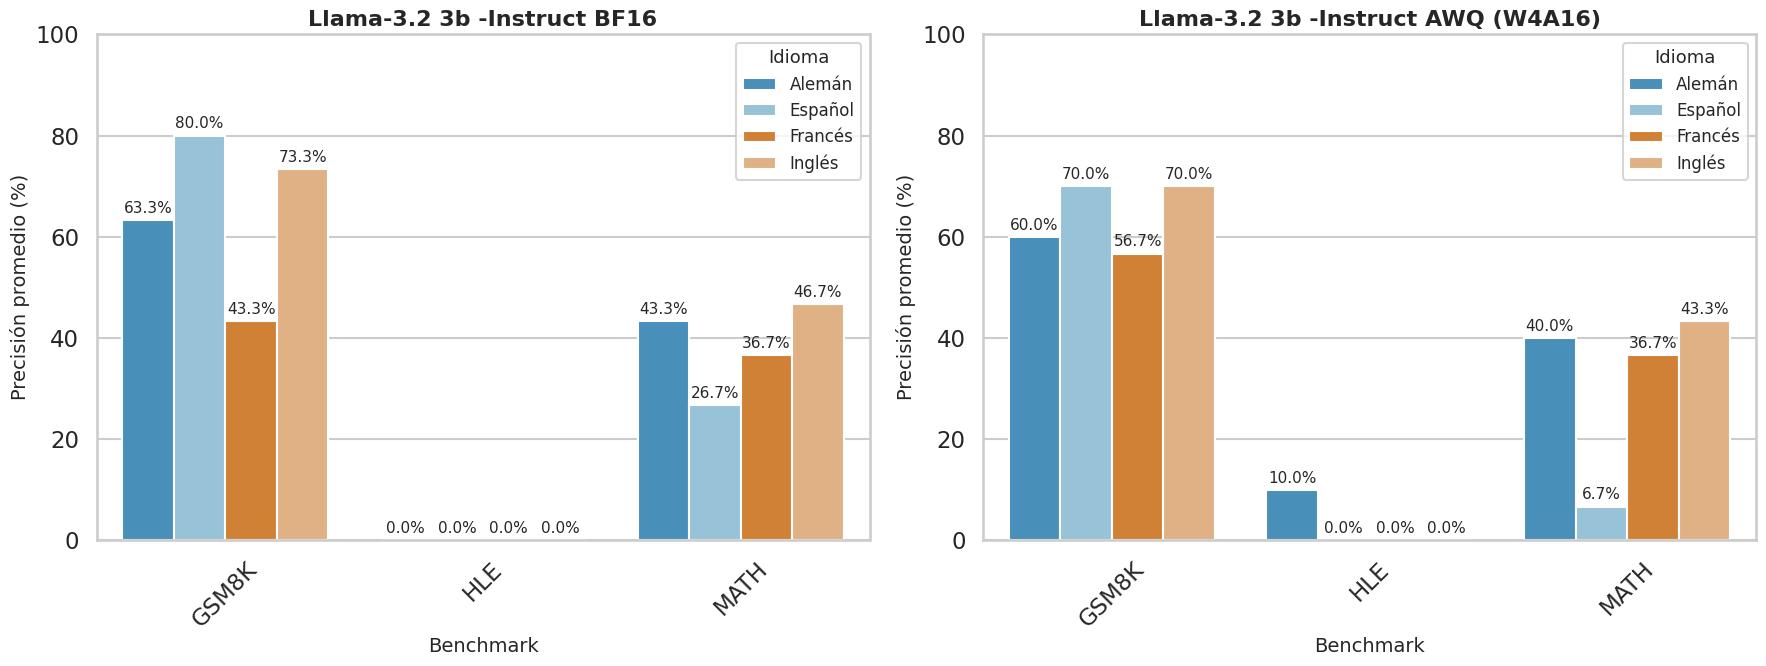

In [ ]:
# Estilo profesional
sns.set(style="whitegrid", context="talk")

# Definir la paleta de colores personalizada
custom_palette = ['#3594cc', '#8cc5e3','#ea801c',  '#f0b077']  # Med blue, light blue,  med orange, light orange

# Filtrar los datos para obtener las filas correspondientes a "sin cuantizar" y "cuantizado"
df_before_quantize = precision_benchmark[precision_benchmark['Estado'] == 'sin cuantizar']
df_after_quantize = precision_benchmark[precision_benchmark['Estado'] == 'cuantizado']

# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico de la precisión antes de cuantizar
sns.barplot(data=df_before_quantize,
            x='Benchmark',
            y='precision_promedio_mean',
            hue='Idioma',
            ax=axes[0],
            palette=custom_palette)

axes[0].set_title('Llama-3.2 3b -Instruct BF16', fontsize=16, weight='bold')
axes[0].set_xlabel('Benchmark', fontsize=14)
axes[0].set_ylabel('Precisión promedio (%)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 100)

# Agregar etiquetas de porcentaje en las barras (antes de cuantizar)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', padding=3, fontsize=11)

# Gráfico de la precisión después de cuantizar
sns.barplot(data=df_after_quantize,
            x='Benchmark',
            y='precision_promedio_mean',
            hue='Idioma',
            ax=axes[1],
            palette=custom_palette)

axes[1].set_title('Llama-3.2 3b -Instruct AWQ (W4A16)', fontsize=16, weight='bold')
axes[1].set_xlabel('Benchmark', fontsize=14)
axes[1].set_ylabel('Precisión promedio (%)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

# Agregar etiquetas de porcentaje en las barras (después de cuantizar)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', padding=3, fontsize=11)

# Ajustar leyenda
axes[0].legend(title='Idioma', fontsize=12, title_fontsize=13)
axes[1].legend(title='Idioma', fontsize=12, title_fontsize=13)

# Ajustar diseño general
plt.tight_layout()
plt.show()


In [ ]:
# Filtrar el modelo Phi 3.5 mini-Instruct
df_qwen = df[df['Modelo'] == 'Phi 3.5 mini-Instruct']

# Calcular el Promedio de Precisión entre los tres intentos
df_qwen['precision_promedio'] = df_qwen[['Intento 1', 'Intento 2', 'Intento 3']].mean(axis=1)

# Agrupar por Benchmark, Idioma y Estado, y calcular el promedio de precisión
precision_benchmark = df_qwen.groupby(['Benchmark', 'Idioma', 'Estado']).agg(
    precision_promedio_mean=('precision_promedio', 'mean')
).reset_index()

# Convertir a porcentaje
precision_benchmark['precision_promedio_mean'] = (precision_benchmark['precision_promedio_mean'] * 100).round(2)

# Mostrar el resultado
print(precision_benchmark)


   Benchmark   Idioma         Estado  precision_promedio_mean
0      GSM8K   Alemán     cuantizado                    63.33
1      GSM8K   Alemán  sin cuantizar                    53.33
2      GSM8K  Español     cuantizado                    70.00
3      GSM8K  Español  sin cuantizar                    53.33
4      GSM8K  Francés     cuantizado                    46.67
5      GSM8K  Francés  sin cuantizar                    60.00
6      GSM8K   Inglés     cuantizado                    76.67
7      GSM8K   Inglés  sin cuantizar                    63.33
8        HLE   Alemán     cuantizado                     0.00
9        HLE   Alemán  sin cuantizar                     0.00
10       HLE  Español     cuantizado                     0.00
11       HLE  Español  sin cuantizar                     6.67
12       HLE  Francés     cuantizado                     6.67
13       HLE  Francés  sin cuantizar                     0.00
14       HLE   Inglés     cuantizado                     0.00
15      

<ipython-input-57-314f6788ad92>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qwen['precision_promedio'] = df_qwen[['Intento 1', 'Intento 2', 'Intento 3']].mean(axis=1)


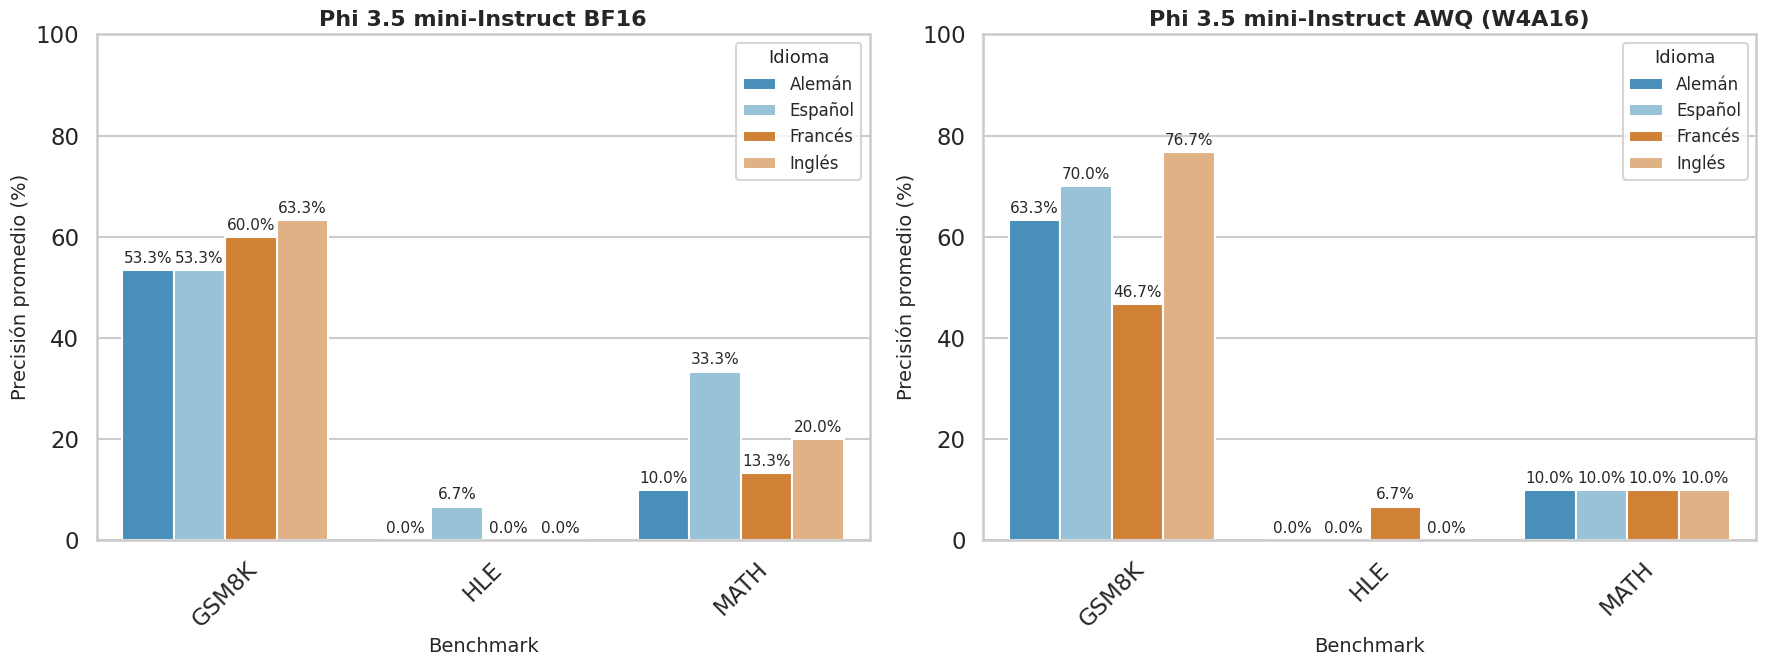

In [ ]:
# Estilo profesional
sns.set(style="whitegrid", context="talk")

# Definir la paleta de colores personalizada
custom_palette = ['#3594cc', '#8cc5e3','#ea801c',  '#f0b077']  # Med blue, light blue,  med orange, light orange

# Filtrar los datos para obtener las filas correspondientes a "sin cuantizar" y "cuantizado"
df_before_quantize = precision_benchmark[precision_benchmark['Estado'] == 'sin cuantizar']
df_after_quantize = precision_benchmark[precision_benchmark['Estado'] == 'cuantizado']

# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico de la precisión antes de cuantizar
sns.barplot(data=df_before_quantize,
            x='Benchmark',
            y='precision_promedio_mean',
            hue='Idioma',
            ax=axes[0],
            palette=custom_palette)

axes[0].set_title('Phi 3.5 mini-Instruct BF16', fontsize=16, weight='bold')
axes[0].set_xlabel('Benchmark', fontsize=14)
axes[0].set_ylabel('Precisión promedio (%)', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 100)

# Agregar etiquetas de porcentaje en las barras (antes de cuantizar)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', padding=3, fontsize=11)

# Gráfico de la precisión después de cuantizar
sns.barplot(data=df_after_quantize,
            x='Benchmark',
            y='precision_promedio_mean',
            hue='Idioma',
            ax=axes[1],
            palette=custom_palette)

axes[1].set_title('Phi 3.5 mini-Instruct AWQ (W4A16)', fontsize=16, weight='bold')
axes[1].set_xlabel('Benchmark', fontsize=14)
axes[1].set_ylabel('Precisión promedio (%)', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 100)

# Agregar etiquetas de porcentaje en las barras (después de cuantizar)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', padding=3, fontsize=11)

# Ajustar leyenda
axes[0].legend(title='Idioma', fontsize=12, title_fontsize=13)
axes[1].legend(title='Idioma', fontsize=12, title_fontsize=13)

# Ajustar diseño general
plt.tight_layout()
plt.show()